# Lungs Deseases Classification 

Classifying if pneumonia is detected in a given lung X-Rays using Convolution Neural Network (CNN)

Dateset Link: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Data Preprocessing

In [39]:
# Importing Libraries
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [40]:
# Set Trainning and Test set
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [41]:
# Preprocessing the Training set

# Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Importing Training Set
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (112, 112),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') 

Found 5216 images belonging to 2 classes.


In [42]:
# Preprocessing the Test set

# Feature Scaling
test_datagen = ImageDataGenerator(rescale = 1./255)

#Importing Test Set
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (112, 112),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


### Building the CNN

In [43]:
# Importing Libraries
from keras.layers import Input, Lambda, Dense, Flatten #we this we will create the last layers
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
import numpy as np
from glob import glob

In [44]:
# re-size all the images
IMAGE_SIZE = [112, 112]

In [45]:
# Add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False #layers already trained

In [46]:
#Flattenning Last Layer
x = Flatten()(vgg.output)

In [47]:
# Output Layer
folders = glob('chest_xray/train/*')
prediction = Dense(len(folders), activation='softmax')(x)

In [48]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 112, 112, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 28, 28, 128)       0   

### Trainning the CNN

In [49]:
# Compiling the CNN
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
# Training the CNN on the Training set and evaluating it on the Test set
r = model.fit_generator(training_set,
                        validation_data=test_set,
                        epochs=5,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

Epoch 1/5
163/163 [==============================] - 634s 4s/step - loss: 0.2536 - accuracy: 0.8953 - val_loss: 0.1689 - val_accuracy: 0.8926
Epoch 2/5
163/163 [==============================] - 541s 3s/step - loss: 0.1590 - accuracy: 0.9419 - val_loss: 0.7544 - val_accuracy: 0.8686
Epoch 3/5
163/163 [==============================] - 562s 3s/step - loss: 0.1404 - accuracy: 0.9498 - val_loss: 0.4087 - val_accuracy: 0.9119
Epoch 4/5
163/163 [==============================] - 560s 3s/step - loss: 0.1293 - accuracy: 0.9513 - val_loss: 0.2774 - val_accuracy: 0.9151
Epoch 5/5
163/163 [==============================] - 546s 3s/step - loss: 0.1333 - accuracy: 0.9475 - val_loss: 0.3425 - val_accuracy: 0.9087


### Model Evaluation

In [51]:
#Importing libraries
import matplotlib.pyplot as plt

In [52]:
# List all data in r
print(r.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


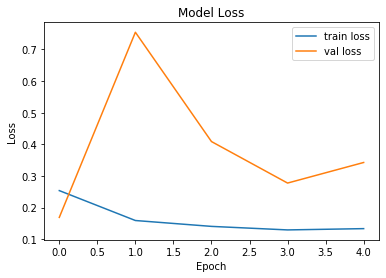

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

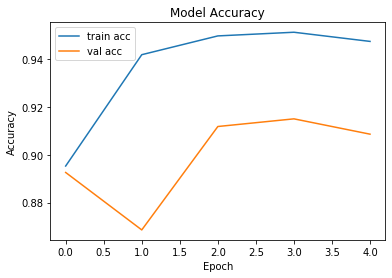

<Figure size 432x288 with 0 Axes>

In [55]:
# Summarize history for accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Saving Model

In [56]:
#Importing Libraries
import tensorflow as tf
from keras.models import load_model
model.save('model_vgg16.h5')

## Making Predictions

In [57]:
#Importing libraries
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

### Prediction 1

Predicting the following image:

In [59]:
model = load_model('model_vgg16.h5')
img = image.load_img('val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size=(112, 112))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

if classes[0][0] == 1:
  print("Prediction: No desease detected.")
else:
  print("Prediction: Pneumonia detected.")

Prediction: Pneumonia detected.


### Prediction 2

Predicting the following image:

In [60]:
model = load_model('model_vgg16.h5')
img = image.load_img('val/NORMAL/NORMAL2-IM-1437-0001.jpeg', target_size=(112, 112))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

if classes[0][0] == 1:
  print("Prediction: No desease detected.")
else:
  print("Prediction: Pneumonia detected.")

Prediction: No desease detected.


### Prediction 3

Predicting the following image:

In [61]:
model = load_model('model_vgg16.h5')
img = image.load_img('val/PNEUMONIA/person1947_bacteria_4876.jpeg', target_size=(112, 112))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

if classes[0][0] == 1:
  print("Prediction: No desease detected.")
else:
  print("Prediction: Pneumonia detected.")

Prediction: Pneumonia detected.


### Prediction 4

Predicting the following image:

In [62]:
model = load_model('model_vgg16.h5')
img = image.load_img('val/PNEUMONIA/person1952_bacteria_4883.jpeg', target_size=(112, 112))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

if classes[0][0] == 1:
  print("Prediction: No desease detected.")
else:
  print("Prediction: Pneumonia detected.")

Prediction: Pneumonia detected.
